<a href="https://colab.research.google.com/github/kenltho2/Num-Meth23/blob/main/Project2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Differentiation 
## CPSMA 4413, Dr. Jacob, 3/26/2023
### Kennedy Thomas, Aaron Arias Vales


In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### *We start by writing our functions to approximate forward, backward, and central difference derivative estimates, along with a function to approximate the second derivative. We recycled our error functions from Project 1.*

In [ ]:
#true error
def terror(true, approx):
  error_t = true - approx
  return error_t

#relative true error 
def rterror(terror,tValue):
  RTerror = terror / tValue
  return RTerror

# function for e^x
def f(x):
  return math.exp(x)

# forward difference
def forward(x,h):
  forx = ((f(x+h) - f(x))) / h
  return forx

# backward difference
def backward(x,h):
  backx = ((f(x-h) - f(x))) / h
  return backx

# central difference
def center(x,h):
  centerx = ((f(x+h) - f(x-h))) / (2*h)
  return centerx

#finite difference
def finite(x,h):
  second_deriv = ( ( f(x+h) - (2*f(x)) + f(x-h) ) ) / h**2
  return second_deriv

# Pandas Dataframes

In [ ]:
#Pandas Data Frame(s) laying out our data, separated into individual dataframes to concatenate later.
# using for loops to fill each frame with appropriate data
tx = 5 # tx is number of rows
dfh = pd.DataFrame({'h': [10**-i for i in range(1,tx+1)]})
dftrue = pd.DataFrame({'true val.': [f(2) for i in range(1,tx+1)]})
dfforward = pd.DataFrame({'forward est.': [forward(2,10**-i) for i in range(1,tx+1)]})
dfback = pd.DataFrame({'back est.': [backward(2,10**-i) for i in range(1,tx+1)]})
dfcenter = pd.DataFrame({'center est.': [center(2,10**-i) for i in range(1,tx+1)]})
dffinite = pd.DataFrame({'finite diff.': [finite(2,10**-i) for i in range(1,tx+1)]})

# dataframes for error values
dfForTruErr= pd.DataFrame({'forward true err.': [terror(f(2),forward(2,10**-i)) for i in range(1,tx+1)]})
dfBackTruErr = pd.DataFrame({'back true err.': [terror(f(2),backward(2,10**-i)) for i in range(1,tx+1)]})
dfCenterTruErr = pd.DataFrame({'center true err.': [terror(f(2),center(2,10**-i)) for i in range(1,tx+1)]})
dfFiniteTruErr = pd.DataFrame({'finite true err': [terror(f(2),finite(2,10**-i)) for i in range(1,tx+1)]})
dfForRelErr = pd.DataFrame({'forward relative err.': [rterror(terror(f(2),forward(2,10**-i)),f(2)) for i in range(1, tx+1)]})
dfBackRelErr = pd.DataFrame({'back relative err': [rterror(terror(f(2),backward(2,10**-i)),f(2)) for i in range(1, tx+1)]})
dfCenRelErr = pd.DataFrame({'center relative err': [rterror(terror(f(2),center(2,10**-i)),f(2)) for i in range(1, tx+1)]})
dfFiniteRelErr = pd.DataFrame({'finite relative err': [rterror(terror(f(2),finite(2,10**-i)),f(2)) for i in range(1, tx+1)]})

# Forward Difference Derivative Estimate

In [ ]:
#concatenating the tables necessary for the forward difference derivative estimate

Forward_Table = pd.concat([dfh,dftrue,dfforward,dfForTruErr,dfForRelErr], axis= 1)
Forward_Table

,h,true val.,forward est.,forward true err.,forward relative err.
0,0.10000,7.389056,7.771138,-0.382082,-0.051709
1,0.01000,7.389056,7.426125,-0.037069,-0.005017
2,0.00100,7.389056,7.392752,-0.003696,-0.000500
3,0.00010,7.389056,7.389426,-0.000369,-0.000050
4,0.00001,7.389056,7.389093,-0.000037,-0.000005


**The forward difference slightly underestimates the derivative, getting smaller as the step size shrinks.**

# Backward Difference Derivative Estimate

In [ ]:
#concatenating the tables necessary for the backward difference derivative estimate

Backward_Table = pd.concat([dfh,dftrue,dfback,dfBackTruErr,dfBackRelErr], axis = 1)
Backward_Table

,h,true val.,back est.,back true err.,back relative err
0,0.10000,7.389056,-7.031617,14.420673,1.951626
1,0.01000,7.389056,-7.352234,14.741290,1.995017
2,0.00100,7.389056,-7.385363,14.774419,1.999500
3,0.00010,7.389056,-7.388687,14.777743,1.999950
4,0.00001,7.389056,-7.389019,14.778075,1.999995


**The backward difference derivative estimate tends toward the negative of the true value of the function, again, getting closer and closer as the step size gets smaller.**

# Central Difference Derivative Estimate

In [ ]:
#concatenating the tables necessary for the central difference derivative estimate

Center_Table = pd.concat([dfh,dftrue,dfcenter,dfCenterTruErr,dfCenRelErr], axis = 1)
Center_Table

,h,true val.,center est.,center true err.,center relative err
0,0.10000,7.389056,7.401377,-1.232125e-02,-1.667500e-03
1,0.01000,7.389056,7.389179,-1.231516e-04,-1.666675e-05
2,0.00100,7.389056,7.389057,-1.231509e-06,-1.666666e-07
3,0.00010,7.389056,7.389056,-1.232264e-08,-1.667688e-09
4,0.00001,7.389056,7.389056,-1.856799e-10,-2.512904e-11


**The central difference derivative estimate is the most precise approximation. It is accurate up to 4 significant digits where $ h=\frac{1}{100} $, compared to the forward estimate, which is not that precise until $ h=\frac{1}{10000}$.**

# Finite Difference Second Derivative Estimate

In [ ]:
#concatenating the tables necessary for the second derivative estimate

Finite_Table = pd.concat([dfh,dftrue,dffinite,dfFiniteTruErr,dfFiniteRelErr], axis = 1)
Finite_Table

,h,true val.,finite diff.,finite true err,finite relative err
0,0.10000,7.389056,7.395216,-6.159600e-03,-8.336112e-04
1,0.01000,7.389056,7.389118,-6.157566e-05,-8.333359e-06
2,0.00100,7.389056,7.389057,-6.160042e-07,-8.336710e-08
3,0.00010,7.389056,7.389056,-1.124070e-07,-1.521264e-08
4,0.00001,7.389056,7.389049,6.726567e-06,9.103418e-07


# Lagrange Interpolation

**The Lagrange Interpolation is a linear function used to estimate the derivative of a function given k+1 data points. We define it as:**

$L(x)=\sum_{j=0}^{k}y_jl_j(x)$ 

**where**

$l_j(x)= \prod_{i=0,i\neq j}^{k}\frac{x-x_i}{x_j-x_i}$ 

**Our Lagrange Interpolation is of degree 2. If it had more degrees, it would only be more accurate. Each factor parameterizes the given points that lie on the true function and build a polynomial around them. For each extra point, that is another parameter directly from the true function for the polynomial to operate by.**

**The values $y_j l_j(x)$ in $L_j(x)$ create a polynomial where $y_j$ is the coefficient for the $j$th term and $l_j(x)$ is the polynomial term with solutions (zeroes) at $x_i$ where $i\neq j$.** 

In [ ]:
# Define the function we want to interpolate
def f(x):
    return np.exp(x)

# Define the points we want to use for interpolation
center = 2
x_vals = [center, center + 0.1, 2*center]
y_vals = [f(x) for x in x_vals]

# Define a function to compute the Lagrange polynomial
def lagrange(x, x_vals, y_vals):
    n = len(x_vals)
    lag_poly = 0
    for i in range(n):
        term = y_vals[i]
        for j in range(n):
            if i != j:
                term *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        lag_poly += term
    return lag_poly

# Interpolate the function at center + 0.2
interp_x = center + 0.2
interp_y = lagrange(interp_x, x_vals, y_vals)
true_y = f(interp_x)

# Compute the absolute and relative errors
abs_error = abs(interp_y - true_y)
rel_error = abs_error / abs(true_y)

# Compute the second derivative of the Lagrange polynomial
def lagrange_second_deriv(x, x_vals, y_vals):
    n = len(x_vals)
    lag_poly_second_deriv = 0
    for i in range(n):
        term = 0
        for j in range(n):
            if i != j:
                term += 1 / (x_vals[i] - x_vals[j])
        term *= y_vals[i]
        for j in range(n):
            if i != j:
                term *= (x - x_vals[j])
        lag_poly_second_deriv += term
    return 2 * lag_poly_second_deriv / ((interp_x - center)**2)

# Compute the absolute and relative errors of the second derivative
interp_second_deriv = lagrange_second_deriv(interp_x, x_vals, y_vals)
true_second_deriv = f(interp_x)

abs_error_second_deriv = abs(interp_second_deriv - true_second_deriv)
rel_error_second_deriv = abs_error_second_deriv / abs(true_second_deriv)

# Graph of Lagrange Interpolation and $ e^x $

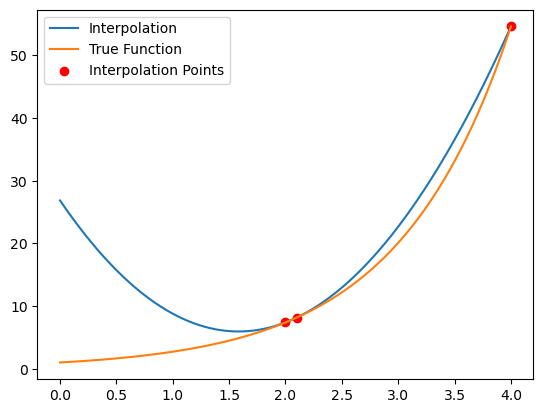

In [ ]:
# Plot the interpolation and the original function
x_range = np.linspace(0, 2*center, 1000)
interp_y_vals = [lagrange(x, x_vals, y_vals) for x in x_range]
true_y_vals = [f(x) for x in x_range]

plt.plot(x_range, interp_y_vals, label="Interpolation")
plt.plot(x_range, true_y_vals, label="True Function")
plt.scatter(x_vals, y_vals, color="red", label="Interpolation Points")
plt.legend()
plt.show()

# Error of Lagrange Interpolation

In [ ]:
print('true value = ' + str(f(2.2)))
print('approximate value = ' + str(lagrange(2.2,x_vals,y_vals)))

print('true error = ' + str(terror(f(2.2),lagrange(2.2,x_vals,y_vals))))
print('relative true error =' + str(rterror(terror(f(2.2),lagrange(2.2,x_vals,y_vals)),f(2.2))))

true value = 9.025013499434122
approximate value = 9.10995118758083
true error = -0.08493768814670766
relative true error =-0.009411364110650177


**Our Lagrange Interpolation is 99% accurate at $ x=2.2 $. It is a slight over estimation in our bounds of $[2,4]$.**

# Error of Second Derivative of Lagrange Interpolation

In [ ]:
# error of second deriv at x = 2.2
# f''(2.2) = f'(2.2) = f(2.2) 

print('true value of second derivative = ' + str(f(2.2)))
print('approximate value of second derivative = ' + str(lagrange_second_deriv(2.2,x_vals,y_vals)))
print('true error of second derivative = ' + str(abs_error_second_deriv))
print('relative true error of second derivative = ' + str(rel_error_second_deriv))

true value of second derivative = 9.025013499434122
approximate value of second derivative = -638.246124496993
true error of second derivative = 647.2711379964271
relative true error of second derivative = 71.71968640678617


**The second derivative of our Lagrange Interpolation is not accurate at $x=2.2$. The polynomial does not derive similarly to the function $ e^x $, because $ f^n(x) = e^x $, and the polynomial turns into a much more ghastly polynomial after the derivation rules are applied.**

# Shortcomings

**It isn't all that useful for us in daily life to use this approximation to find the derivative, it is inaccurate outside of the range of points we use to interpolate. It is however, useful for discrete sets of data and gains accuracy as it gains interpolation points.**